# Capstone Project - The Battle of Neighborhoods (Week 2)



##  Business problem and who would be an audience: 

Food Locations are getting really popular among the food lovers and travelers. Prior information about these locations helps a lot in setting up the budget for having multi-cultural restaurants experiences at one place. 
It's unnecessary hassle for traveler to keep moving continuously if restaurants are not plenty and not distributed within shorter distance. As per my past traveling experiences, more time is spent on reaching to places rather than staying and enjoying the food.

**1. Problem Definition:** Compare the boroughs (Manhattan and Queens) of the New York city and determine the *'best cluster that offers large number of multi-cultural restaurant experience'.<br>
**2. Audience :** Multi-cultural Food Lovers <br>

We will be clustering neighborhood of each borough by choosing top three most common restaurants categories. Then, analyzing all clusters we would like to ask following question.

a) Which borough cluster has largest variety of multi-cultural restaurants<br>
b) Discussion on cluster distribution of each borough (evenly or oddly spaced clusters)




##  Datasets:


For this project, two datasets are considered. First dataset will have borough, neighborhood, latitude and longitude information. Second dataset, we will have 'Venue','Venue Latitude','Venue Longitude','Venue Category' along with neighborhood,latitude and longitude information.

**1. First dataset :** New York city dataset that contain boroughs and their neighborhood 
 along with latitude and longitude features.
 
 Dataset source: https://cocl.us/new_york_dataset
 
**2. Second dataset :** Venue','Venue Latitude','Venue Longitude','Venue Category' along with neighbourhood,latitute and longitude information. 
 
Dataset source: https://api.foursquare.com
 
This dataset has Pizza Place, Yoga studio, Coffee Shop, Donut Shop, Restaurants and many more Venue Categories. 
We need to extract only restaurants venue related data values from the dataset. Data fields other than Restaurants venue category will be simply ignored. 

##  Let's Start with datasets

 ###  import packages

In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 1. First dataset : New York dataset


 This dataset has different types of borough, their neighborhood, latitude and longitude information 

### 1.1 create dataframe for New York dataset

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
with open('newyork_data.json') as json_data:
    newyork_nigh = json.load(json_data)
ny_neighborhood = newyork_nigh['features']

# define the dataframe columns
ny_nighcolumn = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 


# instantiate the dataframe
ny_neighborhoods = pd.DataFrame(columns=ny_nighcolumn)
for data in ny_neighborhood:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_neighborhoods = ny_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
NewYork=ny_neighborhoods
NewYork.head()

/bin/sh: wget: command not found


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


 **New York dataset has five different neighborhoods.**

In [3]:
Borough_df=pd.DataFrame(NewYork['Borough'].unique())
Borough_df.columns = ["Borough"]
Borough_df

,Borough
0,Bronx
1,Manhattan
2,Brooklyn
3,Queens
4,Staten Island


### 1. 2 Create Seprate datasets  for Manhattan and  Queens borough


We are interested in comparing Manhattan and Queens boroghs: Also, cluster of each borough 
that has largest variety of restaurants

#### 1. 2.1 Create dataframe for Manhattan 

In [4]:
manhattan_data = NewYork[NewYork['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan=manhattan_data
manhattan_data.head()


,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


#### 2.2 Create dataframe for Queens

In [5]:
queens_data = NewYork[NewYork['Borough'] == 'Queens'].reset_index(drop=True)
queens=queens_data
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


### 1.3  Display Manhattan and Queens Neighborhood on Map

Lets display each Neighborhood of these two boroughs (Manhattan and Queens) on Map

#### 1.3.1 Display Manhattan Neighborhoods on Map

In [6]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))


# create map of New York using latitude and longitude values
map_manhattan_data = folium.Map(location=[latitude, longitude], zoom_start=10)

#Borough	Neighborhood	Latitude	Longitude
# add markers to map
for lat, lng, borough, manhattan_data in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Borough'], manhattan_data['Neighborhood']):
    label = '{}, {}'.format(manhattan_data, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_data)  
    
map_manhattan_data

The geograpical coordinate of New York City are 40.7900869, -73.9598295.


#### 1.3.2 Display Queens Neighborhoods on Map

In [7]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))


# create map of New York using latitude and longitude values
map_queens_data = folium.Map(location=[latitude, longitude], zoom_start=10)

#Borough	Neighborhood	Latitude	Longitude
# add markers to map
for lat, lng, borough, queens_data in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Borough'], queens_data['Neighborhood']):
    label = '{}, {}'.format(queens_data, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens_data)  
    
map_queens_data

The geograpical coordinate of New York City are 40.6524927, -73.7914214158161.


# 2. Second dataset: api.foursquare venue dataset

Now, lets extract the available venues for each neighborhood. Here, different Venue Category options are available
but we are specifically interested in "Restaurant" category 

### api.foursquare Credits

This venue information is extracted from foursquare website

In [8]:
CLIENT_ID = "AKMOVMFCNYW4FIKWEDZMXDHJ4BDPYE0PTREOAK5RQ0O5W2KE"
CLIENT_SECRET = "ZM4WC5XVDSFE4ZUW1WUIPK42IGLKUY5K4ZV4OCC33ROJDGYA"
VERSION = 20191208


## 2.1 Extract Venue dataset related to Neighborhoods in Manhattan and Queens

In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):   
        #print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name,
                             lat,
                             lng,
                             v['venue']['name'],
                             v['venue']['location']['lat'],
                             v['venue']['location']['lng'],
                             v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
# Limit the number of venues to 100
LIMIT = 100

# type your answer here

queens_data_venues = getNearbyVenues(names=queens['Neighborhood'],
                                   latitudes=queens['Latitude'],
                                   longitudes=queens['Longitude'],
                                   radius=500) 
NewYork_venues = getNearbyVenues(names=manhattan['Neighborhood'],
                                   latitudes=manhattan['Latitude'],
                                   longitudes=manhattan['Longitude'],
                                   radius=500)                                   

### 2.1.1  List of all venue options available for Queens Neighborhood

In [11]:
queens_venues=queens_data_venues
print(queens_venues.shape)
queens_venues.head()

(2171, 7)


,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant


### 2.1.2  List of all venue options available for Manhattan Neighborhood

In [12]:
manhattan_venues=NewYork_venues
print(manhattan_venues.shape)
manhattan_venues.head()

(3327, 7)


,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


## 2.2 Extracting only "Restaurant" Venue Neighborhoods from Manhattan and Queens

In [13]:
# consider only Restaurant
def Extract_only_Restaurant(data_frame):
    df=data_frame
    df1=df[df['Venue Category'].str.contains("Restaurant")]
    df1.reset_index(inplace=True)
    df1=df1[['Neighborhood','Latitude','Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']]
    return(df1)


### 2.2.1  List of  only "Restaurant" venues available in Manhattan Neighborhood

In [14]:
manhattan_venues=Extract_only_Restaurant(manhattan_venues)
manhattan_venues.head()

,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.910660,Land & Sea Restaurant,40.877885,-73.905873,Seafood Restaurant
1,Marble Hill,40.876551,-73.910660,Boston Market,40.877430,-73.905412,American Restaurant
2,Chinatown,40.715618,-73.994279,Kiki's,40.714476,-73.992036,Greek Restaurant
3,Chinatown,40.715618,-73.994279,Spicy Village,40.717010,-73.993530,Chinese Restaurant
4,Chinatown,40.715618,-73.994279,The Fat Radish,40.715323,-73.991950,English Restaurant


### 2.2.2  List of only "Restaurant" venues available in Queens Neighborhood

In [15]:
queens_venues=Extract_only_Restaurant(queens_venues)
queens_venues.head()

,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant
2,Astoria,40.768509,-73.915654,Al-sham Sweets and Pastries,40.768077,-73.911561,Middle Eastern Restaurant
3,Astoria,40.768509,-73.915654,El Cafetal,40.770153,-73.918214,Mexican Restaurant
4,Astoria,40.768509,-73.915654,Zyara Resturant,40.766591,-73.912713,Mediterranean Restaurant


### 2.2.3 Let's check how many venues were returned for each Neighborhood

In [16]:
print('There are {} uniques categories in Queens.'.format(len(queens_venues['Venue Category'].unique())))
print('There are {} uniques categories in Manhattan.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 61 uniques categories in Queens.
There are 77 uniques categories in Manhattan.


# 3. Analyze and cluster neighborhoods for Manhattan and Queens

## 3.1 Create one hot encoding 

In [17]:
# one hot encoding
def one_hot_encoding(data_frame):
    manhattan_venues=data_frame
    manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

    # add neighborhood column back to dataframe
    manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

    # move neighborhood column to the first column
    fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
    manhattan_onehot = manhattan_onehot[fixed_columns]
    print(manhattan_onehot.shape)
    return(manhattan_onehot)
manhattan_onehot=one_hot_encoding(manhattan_venues)
queens_onehot=one_hot_encoding(queens_venues)

(917, 78)
(589, 62)


In [18]:
print("Manhattan's one hot encoding")
manhattan_onehot.head()


Manhattan's one hot encoding


,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Chinatown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chinatown,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chinatown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [19]:
print("Queen's one hot encoding")
queens_onehot.head()

Queen's one hot encoding


,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Paella Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Astoria,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by Neighborhood and by taking the mean of the frequency of occurrence of each category

In [20]:
def Group_by_Neighborhood(data_frame):
    manhattan_onehot=data_frame
    manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
    return(manhattan_grouped)
queens_grouped=Group_by_Neighborhood(data_frame=queens_onehot)
manhattan_grouped=Group_by_Neighborhood(data_frame=manhattan_onehot)

#### Let's confirm the new size

In [21]:
print("manhattan_grouped.shape is:",manhattan_grouped.shape)
manhattan_grouped.head()

manhattan_grouped.shape is: (39, 78)


,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,Battery Park City,0.0,0.000000,0.125000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.125000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.375000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.125000,0.125000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.125000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,Carnegie Hill,0.0,0.000000,0.041667,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.041667,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.041667,0.0,0.125000,0.0,0.00000,0.0,0.0,0.00000,0.083333,0.000000,0.083333,0.0,0.125000,0.0,0.0,0.00000,0.041667,0.0,0.0,0.00000,0.041667,0.041667,0.0,0.0,0.0,0.0,0.041667,0.0,0.000000,0.0,0.0,0.0,0.041667,0.041667,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.041667,0.0,0.0,0.00000,0.000000,0.041667,0.0,0.0,0.041667,0.0,0.083333
2,Central Harlem,0.0,0.142857,0.142857,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.071429,0.0,0.142857,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.071429,0.0,0.000000,0.0,0.142857,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.142857,0.00000,0.0,0.0,0.0,0.071429,0.00000,0.000000,0.0,0.0,0.00000,0.071429,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,Chelsea,0.0,0.000000,0.125000,0.0,0.0,0.041667,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.041667,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.041667,0.0,0.00000,0.0,0.0,0.00000,0.041667,0.041667,0.208333,0.0,0.041667,0.0,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.041667,0.0,0.0,0.0,0.0,0.000000,0.0,0.041667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.125000,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.041667,0.0,0.0,0.00000,0.083333,0.041667,0.0,0.0,0.041667,0.0,0.000000
4,Chinatown,0.0,0.000000,0.097561,0.0,0.0,0.048780,0.0,0.02439,0.0,0.0,0.0,0.000000,0.0,0.195122,0.0,0.0,0.0,0.04878,0.073171,0.0,0.0,0.02439,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.02439,0.0,0.0,0.04878,0.000000,0.000000,0.024390,0.0,0.000000,0.0,0.0,0.04878,0.000000,0.0,0.0,0.04878,0.000000,0.024390,0.0,0.0,0.0,0.0,0.024390,0.0,0.000000,0.0,0.0,0.0,0.024390,0.000000,0.0,0.000000,0.02439,0.0,0.0,0.0,0.000000

In [22]:
print("queens_grouped.shape is:",queens_grouped.shape)
queens_grouped.head()

queens_grouped.shape is: (70, 62)


,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Paella Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Arverne,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0
1,Astoria,0.0,0.000000,0.0,0.0,0.0,0.027778,0.027778,0.0,0.0,0.055556,0.0,0.027778,0.0,0.0,0.0,0.0,0.0,0.0,0.027778,0.00,0.0,0.0,0.0,0.000000,0.138889,0.0,0.0,0.0,0.027778,0.0,0.055556,0.055556,0.027778,0.0,0.055556,0.0,0.083333,0.027778,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.027778,0.0,0.0,0.0,0.027778,0.0,0.0,0.027778,0.0
2,Astoria Heights,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,Auburndale,0.0,0.250000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.25,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.250000,0.000000,0.250000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,Bay Terrace,0.0,0.666667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


#### Let's print each Neighborhood along with the top 3 most common venues

In [23]:
num_top_venues = 3

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                 venue  freq
0   Italian Restaurant  0.38
1   Chinese Restaurant  0.12
2  American Restaurant  0.12


----Carnegie Hill----
                   venue  freq
0    Japanese Restaurant  0.12
1      French Restaurant  0.12
2  Vietnamese Restaurant  0.08


----Central Harlem----
                 venue  freq
0  American Restaurant  0.14
1   African Restaurant  0.14
2   Seafood Restaurant  0.14


----Chelsea----
                 venue  freq
0   Italian Restaurant  0.21
1   Seafood Restaurant  0.12
2  American Restaurant  0.12


----Chinatown----
                   venue  freq
0     Chinese Restaurant   0.2
1  Vietnamese Restaurant   0.1
2    American Restaurant   0.1


----Civic Center----
                 venue  freq
0    French Restaurant  0.18
1   Italian Restaurant  0.18
2  American Restaurant  0.14


----Clinton----
                      venue  freq
0       American Restaurant  0.19
1        Italian Restaurant  0.14
2  Mediterranean Restaurant  0.1

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

** Now let's create the new dataframe and display the top 3 venues for each neighborhood.**

In [25]:
 def top_3_venues(data_frame):   
    manhattan_grouped=data_frame
    num_top_venues = 3

    indicators = ['st', 'nd', 'rd']

    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

    for ind in np.arange(manhattan_grouped.shape[0]):
        neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

    return(neighborhoods_venues_sorted)
manhattan_neighborhoods_venues_sorted=top_3_venues(data_frame=manhattan_grouped)
print("manhattan_neighborhoods_venues_sorted.shape:",manhattan_neighborhoods_venues_sorted.shape)
queens_neighborhoods_venues_sorted=top_3_venues(data_frame=queens_grouped) 
print("queens_neighborhoods_venues_sorted.shape:",queens_neighborhoods_venues_sorted.shape)

manhattan_neighborhoods_venues_sorted.shape: (39, 4)
queens_neighborhoods_venues_sorted.shape: (70, 4)


## 3.2.1 **Top 3 venues for each neighborhood in Manhattan**

In [26]:
manhattan_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Battery Park City,Italian Restaurant,Sushi Restaurant,American Restaurant
1,Carnegie Hill,French Restaurant,Japanese Restaurant,Indian Restaurant
2,Central Harlem,African Restaurant,American Restaurant,Seafood Restaurant
3,Chelsea,Italian Restaurant,American Restaurant,Seafood Restaurant
4,Chinatown,Chinese Restaurant,Vietnamese Restaurant,American Restaurant


## 3.2.2 **Top 3 venues for each neighborhood in Queens**

In [27]:
queens_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Arverne,Thai Restaurant,Vietnamese Restaurant,Dumpling Restaurant
1,Astoria,Middle Eastern Restaurant,Greek Restaurant,Seafood Restaurant
2,Astoria Heights,Italian Restaurant,Indonesian Restaurant,Hotpot Restaurant
3,Auburndale,Italian Restaurant,American Restaurant,Korean Restaurant
4,Bay Terrace,American Restaurant,Gluten-free Restaurant,Vietnamese Restaurant


## 4. K-means Cluster Neighborhoods Algorithm : 

### **Run *k*-means to clustering algorithm using cluster value as  5  (K=5)**

In [28]:
 def set_number_of_clusters(data_frame):  
    # set number of clusters
    manhattan_grouped=data_frame
    kclusters = 5

    manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

    # check cluster labels generated for each row in the dataframe

    kmeans.labels_[0:10]
    return(kmeans)
manhattan_kmeans=set_number_of_clusters(data_frame=manhattan_grouped)
queens_kmeans=set_number_of_clusters(data_frame=queens_grouped)
manhattan_kmeans.labels_[0:10]

array([3, 2, 2, 3, 2, 3, 3, 0, 2, 3], dtype=int32)

** Assign Cluster Lables to each Neighborhood **

In [29]:
# Add clustering labels
def add_clustering_labels(manhattan_neighborhoods_venues_sorted,manhattan_kmeans,manhattan):
    manhattan_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', manhattan_kmeans.labels_)
    manhattan_merged = manhattan

    # Merge toronto_grouped with toronto to add latitude/longitude for each postal code
    manhattan_merged = manhattan_merged.join(manhattan_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
    manhattan_merged=manhattan_merged.dropna(subset=['Cluster Labels'])
    manhattan_merged[['Cluster Labels']] = manhattan_merged[['Cluster Labels']].astype('int')
    print(manhattan_merged.shape)
    return(manhattan_merged)
manhattan_merged=add_clustering_labels(manhattan_neighborhoods_venues_sorted,manhattan_kmeans,manhattan)
queens_merged=add_clustering_labels(manhattan_neighborhoods_venues_sorted=queens_neighborhoods_venues_sorted,manhattan_kmeans=queens_kmeans,manhattan=queens)

(39, 8)
(70, 8)


## 4.1 ** Plot Neighborhood Count of 1st, 2nd and 3rd most common restaurant venues **

manhattan_merged total: 39
queens_merged total: 70


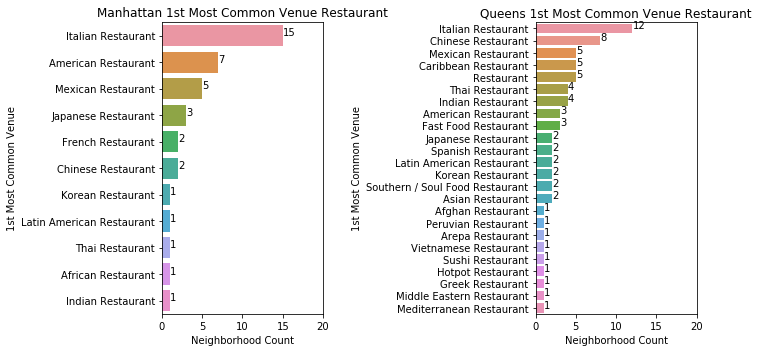

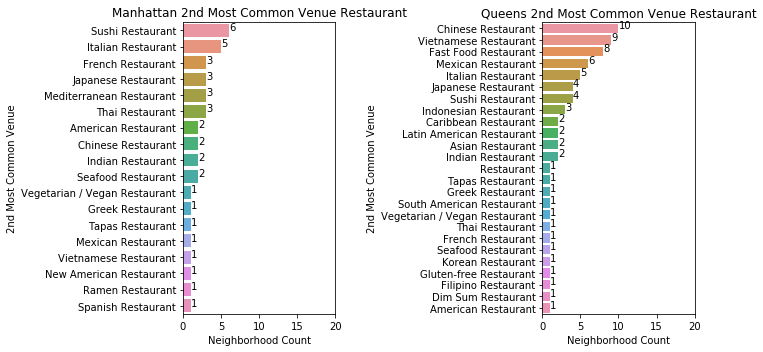

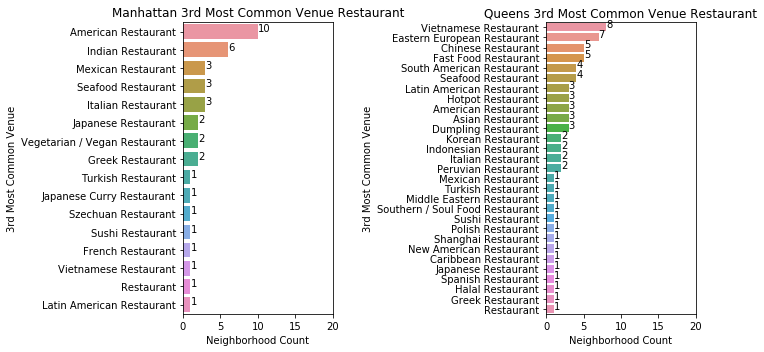

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
def display_first_sec_third_choices(manhattan_merged,queens_merged,choice_column):
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    ax1=sns.countplot(y=choice_column, data=manhattan_merged, order = manhattan_merged[choice_column].value_counts().index)
    ax1.set_title('Manhattan ' + choice_column +" Restaurant")

    for p in ax1.patches:
            percentage = p.get_width()#'{:.1f}%'.format(100 * p.get_width()/total)
            #print(percentage)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax1.annotate(percentage, (x, y))
    plt.xlim((0,20))
    plt.xlabel('Neighborhood Count')
    plt.subplot(1, 2, 2)
    ax2=sns.countplot(y=choice_column, data=queens_merged, order = queens_merged [choice_column].value_counts().index)
    ax2.set_title('Queens ' + choice_column +" Restaurant")

  
    for p in ax2.patches:
            percentage = p.get_width()#'{:.1f}%' .format(100 * p.get_width()/total)
            #print(percentage)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax2.annotate(percentage, (x, y))

    plt.tight_layout()

    plt.xlabel('Neighborhood Count')
    plt.xlim((0,20))
    plt.show()  
    return

choice_column='1st Most Common Venue'
print('manhattan_merged total:', len(manhattan_merged[choice_column])) 
print('queens_merged total:', len(queens_merged[choice_column]))
display_first_sec_third_choices(manhattan_merged,queens_merged,choice_column='1st Most Common Venue')
display_first_sec_third_choices(manhattan_merged,queens_merged,choice_column='2nd Most Common Venue')
display_first_sec_third_choices(manhattan_merged,queens_merged,choice_column='3rd Most Common Venue')
#manhattan_merged.head()

**Observations:** Overall, Queen has a wide variety of food restaurants categories in top 3 most restaurant venues compared to Manhattan.

## 4.2 ** Display Clusters  Lables of Queens **

In [31]:
queens_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,2,Middle Eastern Restaurant,Greek Restaurant,Seafood Restaurant
1,Queens,Woodside,40.746349,-73.901842,0,Thai Restaurant,Filipino Restaurant,Latin American Restaurant
2,Queens,Jackson Heights,40.751981,-73.882821,0,Latin American Restaurant,South American Restaurant,Peruvian Restaurant
3,Queens,Elmhurst,40.744049,-73.881656,0,Thai Restaurant,Mexican Restaurant,South American Restaurant
4,Queens,Howard Beach,40.654225,-73.838138,2,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant


# 5. Dislpay Clusters on Maps

## 5.1 Dislpay Manhattan Neighborhood Clusters on Maps 

In [32]:
# create map
latitude=40.7900869
longitude=-73.9598295
manhattan_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
kclusters=5
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(manhattan_map_clusters)
       
manhattan_map_clusters

**Observations:** 
In above Manhattan's map,”light green” colored cluster contains a greater number of neighborhoods compared to other clusters.


## 5.2 Dislpay Queens Neighborhood Clusters on Maps 

In [33]:
# create map

latitude=40.6524927
longitude=-73.7914214158161
queens_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(queens_merged['Latitude'], queens_merged['Longitude'], queens_merged['Neighborhood'], queens_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(queens_map_clusters)
       
queens_map_clusters

**Observations:** 
In above Queens's map,”light blue” colored cluster contains a greater number of neighborhoods compared to other clusters.


##  5.3 Plot Neighborhood Count 5 Cluster lables of Manhattan and Queens

manhattan_merged total: 39
queens_merged total: 70


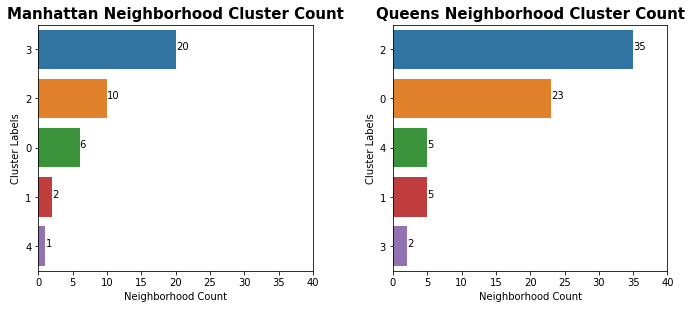

In [34]:
def Neighborhood_Cluster_Count(manhattan_merged,queens_merged):
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    ax1=sns.countplot(y="Cluster Labels", data=manhattan_merged,order = manhattan_merged["Cluster Labels"].value_counts().index)
    ax1.set_title('Manhattan Neighborhood Cluster Count',fontsize=15,fontweight="bold")
    total = len(manhattan_merged['Cluster Labels'])
    print('manhattan_merged total:', total)
    for p in ax1.patches:
            percentage = p.get_width()#'{:.1f}%'.format(100 * p.get_width()/total)
            #print(percentage)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax1.annotate(percentage, (x, y))

    plt.xlim((0,40))
    plt.xlabel('Neighborhood Count')
    plt.subplot(1, 2, 2)
    ax2=sns.countplot(y="Cluster Labels", data=queens_merged,order = queens_merged ["Cluster Labels"].value_counts().index)
    ax2.set_title('Queens Neighborhood Cluster Count',fontsize=15,fontweight="bold")

    total = len(queens_merged['Cluster Labels'])
    print('queens_merged total:', total)
    for p in ax2.patches:
            percentage = p.get_width()#'{:.1f}%' .format(100 * p.get_width()/total)
            #print(percentage)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax2.annotate(percentage, (x, y))

    plt.tight_layout()
    plt.subplots_adjust(top=0.8)
    plt.xlabel('Neighborhood Count')
    plt.xlim((0,40))
    plt.show()
    manhattan_merged.shape
    queens_merged.shape
    return
Neighborhood_Cluster_Count(manhattan_merged,queens_merged)

**Observations:**<br> 
1.	Manhattan cluster number 3 contains a greater number of neighborhoods compared to others
2.	Queens cluster number 2 contains largest number of neighborhoods compared to others <br>**Guessing solution of our problem:**<br>
•	Cluster number 2 of Queens has a greater number of neighborhoods among all clusters.<br> 
•	Hence, it can be guessed that cluster 2 may offer a greater number of multi-cultural food restaurants. Again, It just a guess. Let’s see the correct results.


## 5.4 Finding cluster with maximum multi-cultural restaurant categories  

**We will Select the cluster that has maximum number of restaurant categories for top 3 most common restaurant venues:**


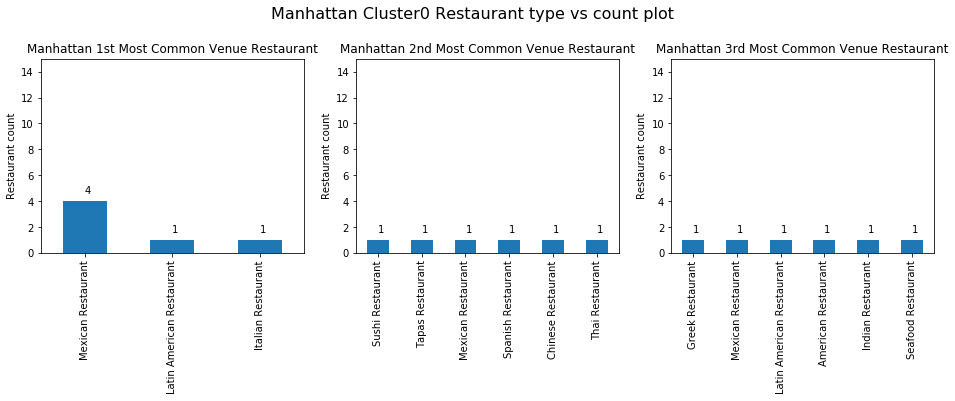

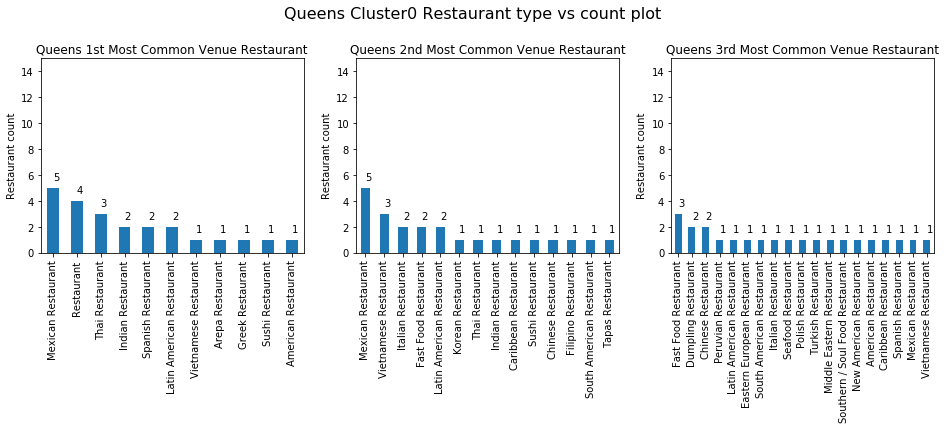

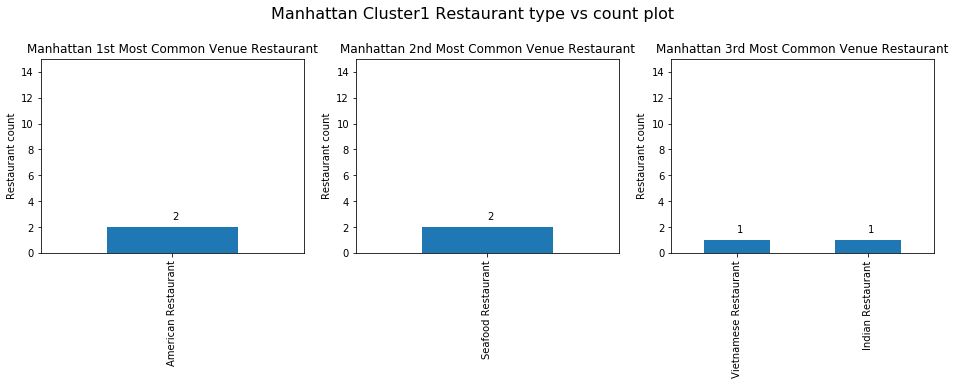

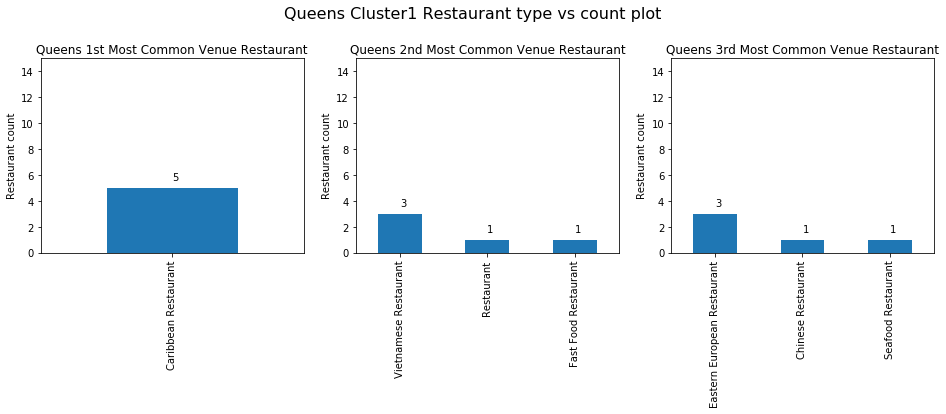

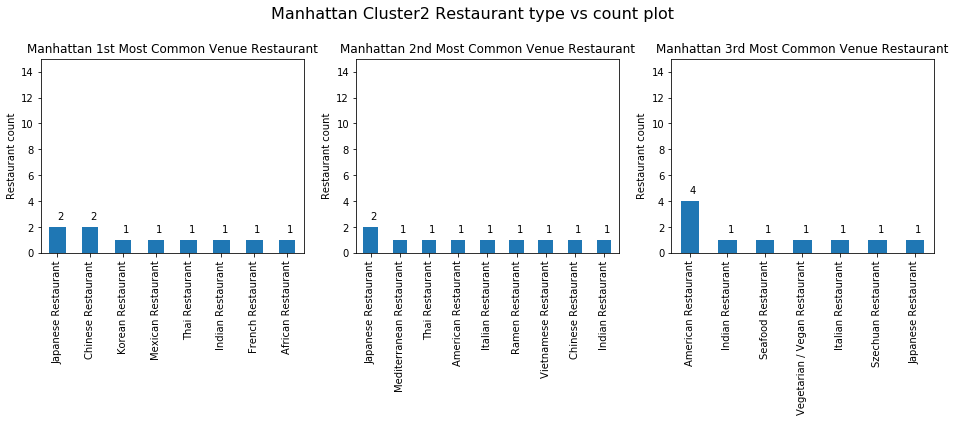

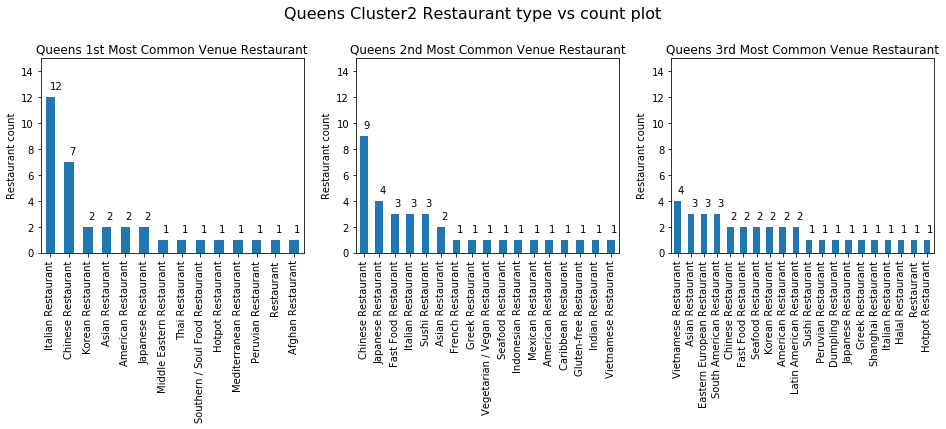

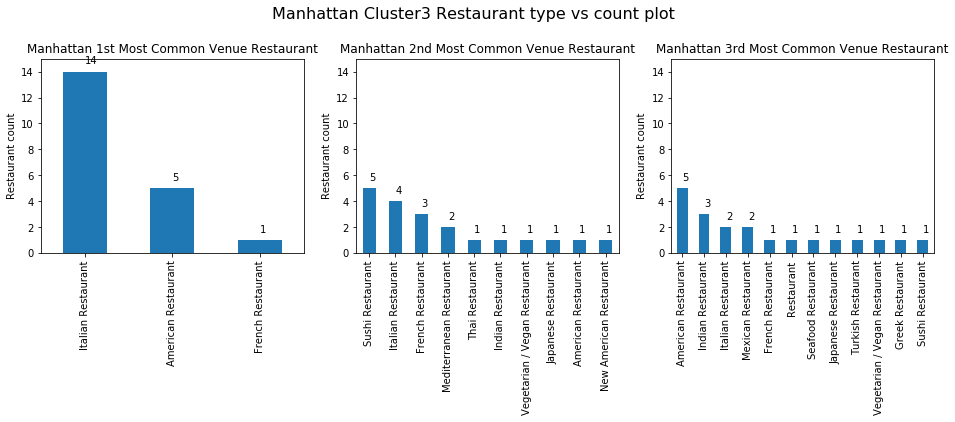

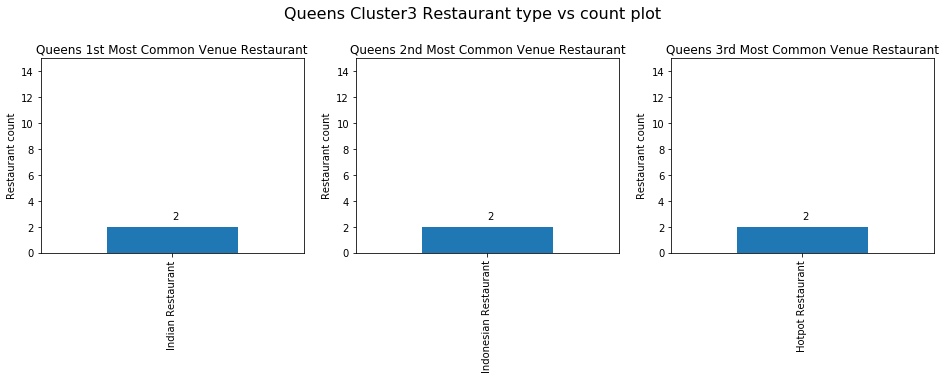

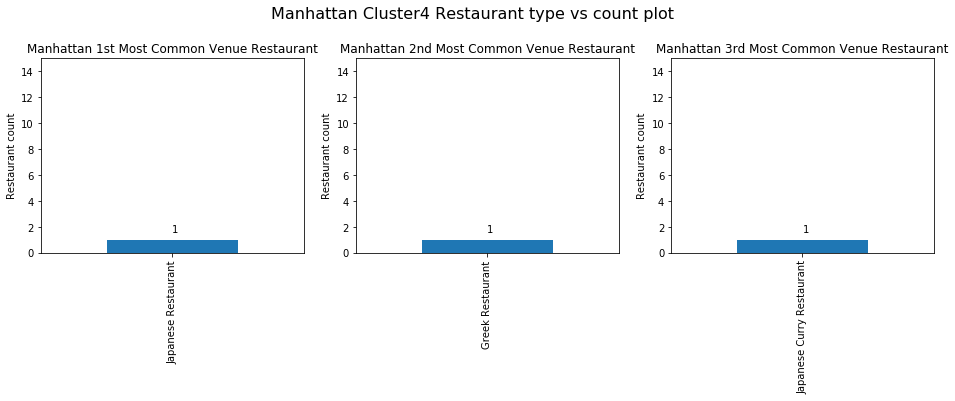

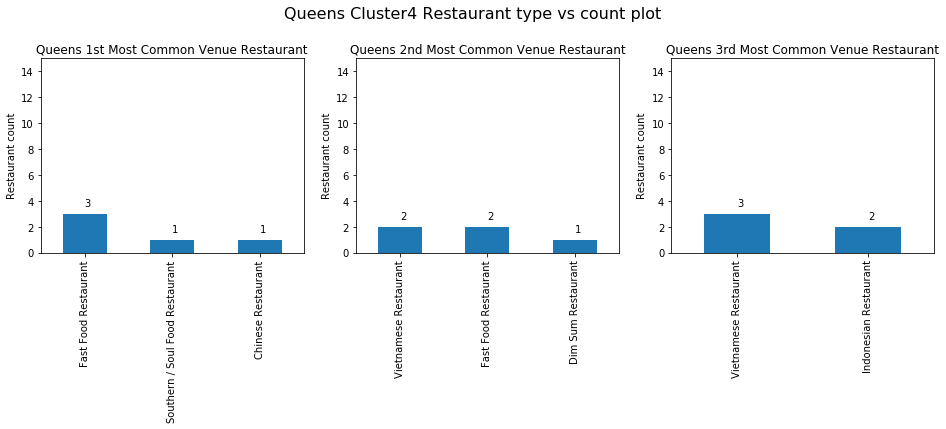

In [48]:
from matplotlib import cm
def Cluster_types_of_Restaurant_count(Cluste_number):    
    
    f = plt.figure(figsize=(16,4))
    f.suptitle('Manhattan Cluster'+ str(Cluste_number)+' Restaurant type vs count plot', fontsize=16)
     
    ax1=f.add_subplot(131)
    manhattan_merged.head()
    ax1=manhattan_merged.loc[manhattan_merged['Cluster Labels'] == Cluste_number, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]['1st Most Common Venue'].value_counts().plot(kind='bar')
    ax1.set_title('Manhattan 1st Most Common Venue Restaurant')
    #ax1.set_xlabel('Types of Restaurant')
    ax1.set_ylabel('Restaurant count')
    ax1.set_ylim([0, 15])
    for p in ax1.patches:
            percentage = p.get_height()#'{:.1f}%'.format(100 * p.get_width()/total)
            #print(percentage)
            x = p.get_x() + p.get_width()/2 
            y = p.get_y() + p.get_height()+ 0.6
            ax1.annotate(percentage, (x, y))
    ax2=f.add_subplot(132)
    ax2=manhattan_merged.loc[manhattan_merged['Cluster Labels'] == Cluste_number, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]['2nd Most Common Venue'].value_counts().plot(kind='bar')
    #ax2.set_xlabel('Types of Restaurant')
    ax2.set_ylabel('Restaurant count')
    ax2.set_title('Manhattan 2nd Most Common Venue Restaurant')
    ax2.set_ylim([0, 15])
    for p in ax2.patches:
            percentage = p.get_height()#'{:.1f}%'.format(100 * p.get_width()/total)
            #print(percentage)
            x = p.get_x() + p.get_width()/2 
            y = p.get_y() + p.get_height()+ 0.6
            ax2.annotate(percentage, (x, y))    
    ax3=f.add_subplot(133)
    ax3=manhattan_merged.loc[manhattan_merged['Cluster Labels'] == Cluste_number, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]['3rd Most Common Venue'].value_counts().plot(kind='bar')
    ax3.set_title('Manhattan 3rd Most Common Venue Restaurant')
    #ax3.set_xlabel('Types of Restaurant')
    ax3.set_ylabel('Restaurant count')
    ax3.set_ylim([0, 15])
    for p in ax3.patches:
            percentage = p.get_height()#'{:.1f}%'.format(100 * p.get_width()/total)
            #print(percentage)
            x = p.get_x() + p.get_width()/2 
            y = p.get_y() + p.get_height()+ 0.6
            ax3.annotate(percentage, (x, y))    
    plt.subplots_adjust(top=0.8)
    plt.show()
    #plt.tight_layout()

    f = plt.figure(figsize=(16,4))
   
    f.suptitle('Queens Cluster'+ str(Cluste_number)+' Restaurant type vs count plot', fontsize=16)
    ax1=f.add_subplot(131)
    queens_merged.head()
    ax1=queens_merged.loc[queens_merged['Cluster Labels'] == Cluste_number, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]['1st Most Common Venue'].value_counts().plot(kind='bar')
    ax1.set_title('Queens 1st Most Common Venue Restaurant')
    #ax1.set_xlabel('Types of Restaurant')
    ax1.set_ylabel('Restaurant count')
    ax1.set_ylim([0, 15])
    for p in ax1.patches:
            percentage = p.get_height()#'{:.1f}%'.format(100 * p.get_width()/total)
            #print(percentage)
            x = p.get_x() + p.get_width()/2 
            y = p.get_y() + p.get_height()+ 0.6
            ax1.annotate(percentage, (x, y))    
    ax2=f.add_subplot(132)
    ax2=queens_merged.loc[queens_merged['Cluster Labels'] == Cluste_number, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]['2nd Most Common Venue'].value_counts().plot(kind='bar')
    ax2.set_title('Queens 2nd Most Common Venue Restaurant')
    #ax2.set_xlabel('Types of Restaurant')
    ax2.set_ylabel('Restaurant count')
    ax2.set_ylim([0, 15])
    for p in ax2.patches:
            percentage = p.get_height()#'{:.1f}%'.format(100 * p.get_width()/total)
            #print(percentage)
            x = p.get_x() + p.get_width()/2 
            y = p.get_y() + p.get_height()+ 0.6
            ax2.annotate(percentage, (x, y))     
    ax3=f.add_subplot(133)
    ax3=queens_merged.loc[queens_merged['Cluster Labels'] == Cluste_number, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]['3rd Most Common Venue'].value_counts().plot(kind='bar')
    ax3.set_title('Queens 3rd Most Common Venue Restaurant')
    for p in ax3.patches:
            percentage = p.get_height()#'{:.1f}%'.format(100 * p.get_width()/total)
            #print(percentage)
            x = p.get_x() + p.get_width()/2 
            y = p.get_y() + p.get_height()+ 0.6
            ax3.annotate(percentage, (x, y))      
    ax3.set_ylim([0, 15])
    #ax3.set_xlabel('Types of Restaurant')
    ax3.set_ylabel('Restaurant count')
    f.subplots_adjust(top=.88)
    plt.subplots_adjust(top=0.8)
    plt.show()
    #plt.tight_layout()
    return

Cluster_types_of_Restaurant_count(Cluste_number=0)  
Cluster_types_of_Restaurant_count(Cluste_number=1)
Cluster_types_of_Restaurant_count(Cluste_number=2)
Cluster_types_of_Restaurant_count(Cluste_number=3)
Cluster_types_of_Restaurant_count(Cluste_number=4)

**“Queens cluster2 ” offers wide variety of restaurant categories and a greater number of restaurants. This clustering information will help multicultural food lovers in making decision about the food locations and having all kinds of food at one place or within shorter distances.**

## 5.4.1 cluster 0

**Manhattan cluster0 Neighborhoods and their 3 Most Common Restaurants**

In [36]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
2,Washington Heights,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Inwood,Mexican Restaurant,Spanish Restaurant,American Restaurant
4,Hamilton Heights,Mexican Restaurant,Chinese Restaurant,Indian Restaurant
5,Manhattanville,Italian Restaurant,Mexican Restaurant,Seafood Restaurant
7,East Harlem,Mexican Restaurant,Thai Restaurant,Latin American Restaurant
36,Tudor City,Mexican Restaurant,Sushi Restaurant,Greek Restaurant


**Queens cluster0 Neighborhoods and their 3 Most Common Restaurants**

In [37]:
queens_merged.loc[queens_merged['Cluster Labels'] == 0, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
1,Woodside,Thai Restaurant,Filipino Restaurant,Latin American Restaurant
2,Jackson Heights,Latin American Restaurant,South American Restaurant,Peruvian Restaurant
3,Elmhurst,Thai Restaurant,Mexican Restaurant,South American Restaurant
5,Corona,Mexican Restaurant,Italian Restaurant,Chinese Restaurant
8,Richmond Hill,Latin American Restaurant,Caribbean Restaurant,Spanish Restaurant
10,Long Island City,Mexican Restaurant,Chinese Restaurant,Italian Restaurant
14,Ridgewood,Greek Restaurant,Italian Restaurant,Polish Restaurant
17,Woodhaven,Restaurant,Thai Restaurant,Chinese Restaurant
18,Ozone Park,Restaurant,Latin American Restaurant,Fast Food Restaurant
22,Bayside,Mexican Restaurant,Indian Restaurant,American Restaurant


## 5.4.2 cluster 1

**Manhattan cluster1 Neighborhoods and their 3 Most Common Restaurants**

In [38]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Marble Hill,American Restaurant,Seafood Restaurant,Vietnamese Restaurant
26,Morningside Heights,American Restaurant,Seafood Restaurant,Indian Restaurant


**Queens cluster1 Neighborhoods and their 3 Most Common Restaurants**

In [39]:
queens_merged.loc[queens_merged['Cluster Labels'] == 1, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
35,South Jamaica,Caribbean Restaurant,Vietnamese Restaurant,Eastern European Restaurant
36,St. Albans,Caribbean Restaurant,Fast Food Restaurant,Seafood Restaurant
39,Cambria Heights,Caribbean Restaurant,Restaurant,Chinese Restaurant
40,Rosedale,Caribbean Restaurant,Vietnamese Restaurant,Eastern European Restaurant
59,Laurelton,Caribbean Restaurant,Vietnamese Restaurant,Eastern European Restaurant


## 5.4.3 cluster 2

**Manhattan cluster2 Neighborhoods and their 3 Most Common Restaurants**

In [40]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
1,Chinatown,Chinese Restaurant,Vietnamese Restaurant,American Restaurant
6,Central Harlem,African Restaurant,American Restaurant,Seafood Restaurant
15,Midtown,Japanese Restaurant,Indian Restaurant,American Restaurant
16,Murray Hill,Japanese Restaurant,Italian Restaurant,American Restaurant
19,East Village,Mexican Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant
20,Lower East Side,Chinese Restaurant,Ramen Restaurant,Japanese Restaurant
22,Little Italy,Thai Restaurant,Mediterranean Restaurant,Italian Restaurant
25,Manhattan Valley,Indian Restaurant,Thai Restaurant,Szechuan Restaurant
30,Carnegie Hill,French Restaurant,Japanese Restaurant,Indian Restaurant
33,Midtown South,Korean Restaurant,Japanese Restaurant,American Restaurant


**Queens cluster2 Neighborhoods and their 3 Most Common Restaurants**

In [41]:
queens_merged.loc[queens_merged['Cluster Labels'] == 2, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Astoria,Middle Eastern Restaurant,Greek Restaurant,Seafood Restaurant
4,Howard Beach,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant
6,Forest Hills,Thai Restaurant,Italian Restaurant,Peruvian Restaurant
7,Kew Gardens,Chinese Restaurant,Indian Restaurant,Italian Restaurant
9,Flushing,Hotpot Restaurant,Chinese Restaurant,Asian Restaurant
11,Sunnyside,Italian Restaurant,Chinese Restaurant,South American Restaurant
13,Maspeth,Japanese Restaurant,Sushi Restaurant,Chinese Restaurant
16,Rego Park,Peruvian Restaurant,Sushi Restaurant,Restaurant
20,College Point,Chinese Restaurant,Asian Restaurant,Latin American Restaurant
23,Auburndale,Italian Restaurant,American Restaurant,Korean Restaurant


## 5.4.4 cluster 3

**Manhattan cluster3 Neighborhoods and their 3 Most Common Restaurants**

In [42]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
8,Upper East Side,Italian Restaurant,French Restaurant,Sushi Restaurant
9,Yorkville,Italian Restaurant,Sushi Restaurant,Japanese Restaurant
10,Lenox Hill,Italian Restaurant,Sushi Restaurant,Turkish Restaurant
12,Upper West Side,Italian Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant
13,Lincoln Square,Italian Restaurant,French Restaurant,American Restaurant
14,Clinton,American Restaurant,Italian Restaurant,French Restaurant
17,Chelsea,Italian Restaurant,American Restaurant,Seafood Restaurant
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,Indian Restaurant
21,Tribeca,American Restaurant,Italian Restaurant,Greek Restaurant
23,Soho,Italian Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant


**Queens cluster3 Neighborhoods and their 3 Most Common Restaurants**

In [43]:
queens_merged.loc[queens_merged['Cluster Labels'] == 3, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
52,Floral Park,Indian Restaurant,Indonesian Restaurant,Hotpot Restaurant
54,Jamaica Estates,Indian Restaurant,Indonesian Restaurant,Hotpot Restaurant


## 5.4.5 cluster 4

**Manhattan cluster4 Neighborhoods and their 3 Most Common Restaurants**

In [44]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
11,Roosevelt Island,Japanese Restaurant,Greek Restaurant,Japanese Curry Restaurant


**Queens cluster4 Neighborhoods and their 3 Most Common Restaurants**

In [45]:
queens_merged.loc[queens_merged['Cluster Labels'] == 4, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
19,South Ozone Park,Fast Food Restaurant,Vietnamese Restaurant,Indonesian Restaurant
38,Springfield Gardens,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant
56,Hillcrest,Fast Food Restaurant,Dim Sum Restaurant,Vietnamese Restaurant
75,Roxbury,Fast Food Restaurant,Vietnamese Restaurant,Indonesian Restaurant
78,Hammels,Southern / Soul Food Restaurant,Fast Food Restaurant,Vietnamese Restaurant
